## Implementación modelo de clasificación con árboles de decisión

Realizado por **Sergio Peñuela (201922873)**

### 1. Importar librerías y llevar a cabo la carga de datos

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
import numpy as np
np.random.seed(3301)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

import matplotlib as mplt
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import tree
from sklearn.utils import resample
import pickle

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

In [20]:
# Carga de datos
df = pd.read_csv("../data/processed_data_min.csv")
df.sample(5)

,class,tokens
21738,0,aaa lit stupidest person ex lik ev comp lik is...
26627,0,sound rain on calm sound ear sound rain one ca...
135198,1,clos amam tir liv tir easy target men tran tir...
140848,0,guess kiss girl meampxbbtw saw post said win s...
79670,0,delet reddit account mean quest delete reddit ...


In [21]:
df.describe()

,class
count,195700.000000
mean,0.437072
std,0.496026
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
# Contar valores nulos
df.isnull().sum()

class      0
tokens    91
dtype: int64

In [23]:
# Eliminar valores nulos
df.dropna(inplace=True)

### 2. Construcción del modelo y variable objetivo

In [24]:
# Se selecciona la variable objetivo, en este caso "Class".
Y = df['class']
# Del conjunto de datos se elimina la variable "Class"
X = df['tokens']

In [25]:
# Vectorización de texto
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.1, ngram_range=(1,2))
X_count = vectorizer.fit_transform(X)

In [26]:
# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_count, Y, test_size=0.15, random_state=0)

#### Antes de seguir se hará primero un ajuste de hiperparámetros para poder obtener el mejor valor posible.

In [27]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [28]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [29]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [30]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [31]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [32]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.87
Exactitud sobre test: 0.86


In [33]:
# Generar reporte de clasificación y métricas
print('Resultados:')
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test))
print("Recall: {}".format(recall_score(y_test,y_pred_test)))
print("Precisión: {}".format(precision_score(y_test,y_pred_test)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test)))
print(classification_report(y_test, y_pred_test))

Resultados:
Exactitud: 0.86
Recall: 0.7865829737151824
Precisión: 0.876541050974906
Puntuación F1: 0.8291291042924489
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     16597
           1       0.88      0.79      0.83     12745

    accuracy                           0.86     29342
   macro avg       0.86      0.85      0.85     29342
weighted avg       0.86      0.86      0.86     29342



In [34]:
# Crear la matriz de confusión
confusion_matrix(y_test, y_pred_test)

array([[15185,  1412],
       [ 2720, 10025]], dtype=int64)

c:\Users\sergy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


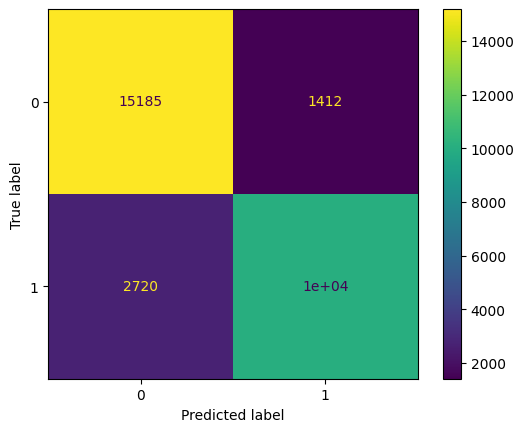

In [35]:
# Se visualiza la matriz de confusión
plot_confusion_matrix(arbol_final, X_test, y_test)  
plt.show() 

0    110085
1     85524
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

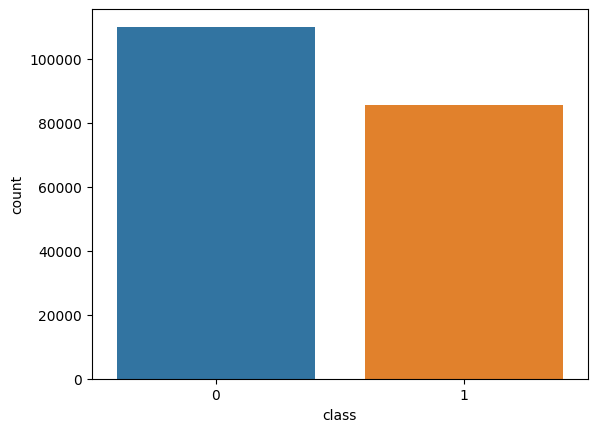

In [36]:
print(df['class'].value_counts())
sns.countplot(x='class', data=df)